In [ ]:
import numpy as np
import tensorflow  as tf
from tensorflow import keras
import  matplotlib.pyplot as plt
import os
import zipfile
from  keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

In [ ]:
#Installing Kaggle API to fetch data directly to colab
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download uraninjo/augmented-alzheimer-mri-dataset-v2

100% 378M/379M [00:18<00:00, 21.3MB/s]
100% 379M/379M [00:18<00:00, 21.3MB/s]


In [ ]:
#Preparing data 
zipref = zipfile.ZipFile("/content/augmented-alzheimer-mri-dataset-v2.zip",'r')

In [ ]:
zipref.extractall()

In [ ]:
zipref.close()

In [ ]:
train_dir = "/content/data/train"
val_dir = "/content/data/val"

In [ ]:
#Normalizing data using Imagedatagenerator
train_gen = ImageDataGenerator(rescale = 1./255)
val_gen =  ImageDataGenerator(rescale = 1./255)


In [ ]:
train_image = train_gen.flow_from_directory(train_dir,
                                            target_size = (200,200),
                                            batch_size=128,
                                            class_mode='categorical')
val_image = val_gen.flow_from_directory(val_dir,
                                        target_size = (200,200),
                                        batch_size = 64,
                                        class_mode = 'categorical')

Found 33984 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [ ]:
#Defining the network architecture
model = keras.Sequential([keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation = 'relu'),
                          keras.layers.Dense(4,activation = 'softmax')])

In [ ]:
model.compile(optimizer = RMSprop(learning_rate = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(train_image,steps_per_epoch=266,epochs = 20,validation_data= val_image,validation_steps =100 )

Epoch 1/20
266/266 [==============================] - 64s 237ms/step - loss: 1.1105 - accuracy: 0.5535 - val_loss: 0.5990 - val_accuracy: 0.7498
Epoch 2/20
266/266 [==============================] - 62s 234ms/step - loss: 0.5398 - accuracy: 0.7704 - val_loss: 0.1854 - val_accuracy: 0.9367
Epoch 3/20
266/266 [==============================] - 61s 230ms/step - loss: 0.2979 - accuracy: 0.8798 - val_loss: 0.0963 - val_accuracy: 0.9647
Epoch 4/20
266/266 [==============================] - 62s 231ms/step - loss: 0.1642 - accuracy: 0.9360 - val_loss: 0.0546 - val_accuracy: 0.9839
Epoch 5/20
266/266 [==============================] - 62s 231ms/step - loss: 0.0835 - accuracy: 0.9697 - val_loss: 0.1584 - val_accuracy: 0.9508
Epoch 6/20
266/266 [==============================] - 61s 229ms/step - loss: 0.0457 - accuracy: 0.9844 - val_loss: 0.0019 - val_accuracy: 0.9994
Epoch 7/20
266/266 [==============================] - 62s 234ms/step - loss: 0.0348 - accuracy: 0.9902 - val_loss: 0.0221 - val_ac

In [ ]:
acc = history.history['accuracy']
x = np.arange(1,len(acc)+1)

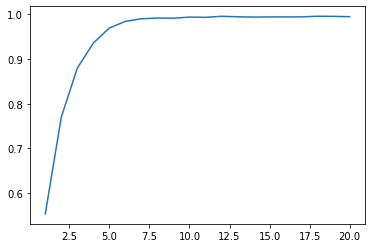

In [ ]:
plt.plot(x,acc)